# ***classification***



## 1.  **Séparation des données**




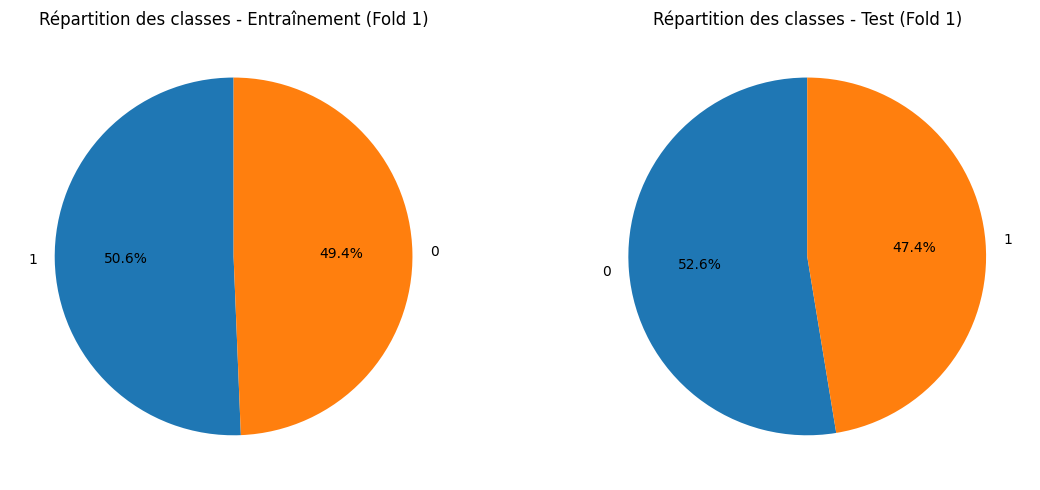

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Charger les données traitées
processed_data = pd.read_csv('/content/processed_data_with_target (1).csv')

# Séparation des caractéristiques et de la cible
X = processed_data.drop('verification.result', axis=1)  # Caractéristiques
y = processed_data['verification.result']  # Cible

# Initialisation de KFold avec 5 splits (ajustez n_splits si nécessaire)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Visualisation de la répartition des classes dans les différents ensembles
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    # Obtenez les indices des ensembles d'entraînement et de test pour chaque fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Visualisation de la répartition des classes pour ce fold
    if fold == 0:  # Just to show the first fold as an example
        # Répartition dans l'ensemble d'entraînement
        axes[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
        axes[0].set_title('Répartition des classes - Entraînement (Fold 1)')

        # Répartition dans l'ensemble de test
        axes[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%', startangle=90)
        axes[1].set_title('Répartition des classes - Test (Fold 1)')

plt.tight_layout()
plt.show()





## **2.   Regression Logistique**




Accuracy (Logistic Regression): 0.723314606741573
Confusion Matrix (Logistic Regression):
 [[262  78]
 [119 253]]


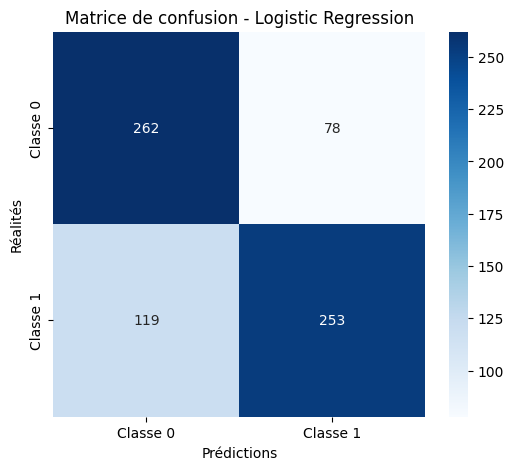

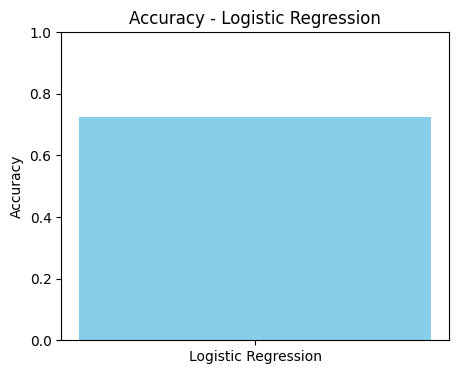

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle
log_reg = LogisticRegression(max_iter=1000)

# Entraînement
log_reg.fit(X_train, y_train)

# Prédictions
y_pred_log_reg = log_reg.predict(X_test)

# Évaluation
accuracy = accuracy_score(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Accuracy (Logistic Regression):", accuracy)
print("Confusion Matrix (Logistic Regression):\n", conf_matrix)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Logistic Regression')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Logistic Regression'], [accuracy], color='skyblue')
plt.title('Accuracy - Logistic Regression')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


## **3 . Neural Networks**



Accuracy (MLP): 0.8539325842696629
Confusion Matrix (MLP):
 [[291  49]
 [ 55 317]]


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


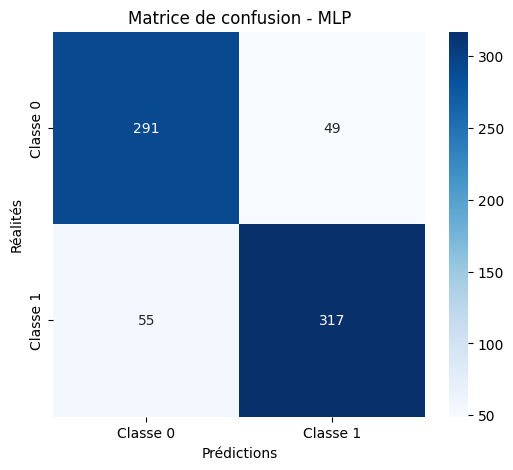

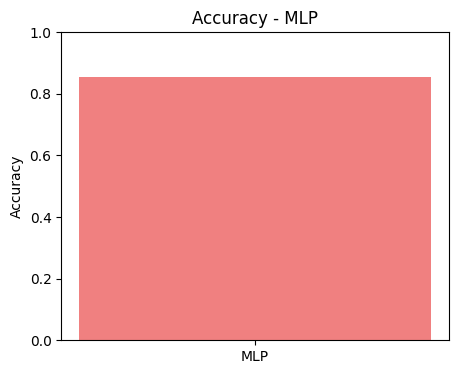

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle de réseau neuronal
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Entraînement
mlp_model.fit(X_train, y_train)

# Prédictions
y_pred_mlp = mlp_model.predict(X_test)

# Évaluation
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

print("Accuracy (MLP):", accuracy_mlp)
print("Confusion Matrix (MLP):\n", conf_matrix_mlp)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - MLP')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['MLP'], [accuracy_mlp], color='lightcoral')
plt.title('Accuracy - MLP')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


## **4 .  l’Ensemble Learning**

a .Voting

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy (Voting): 0.8890449438202247
Confusion Matrix (Voting):
 [[298  42]
 [ 37 335]]


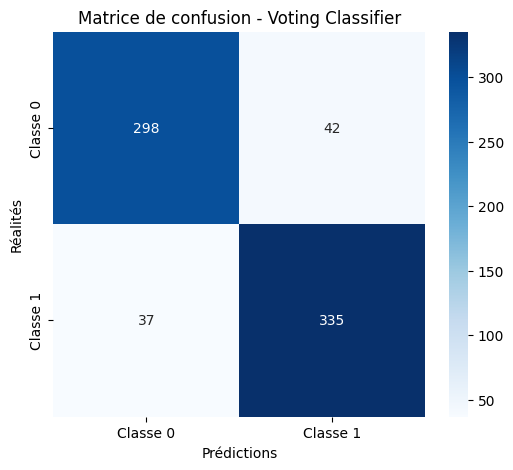

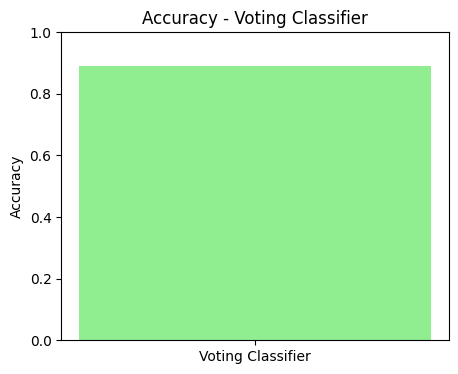

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les modèles de base
log_reg = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(random_state=42)
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), random_state=42)

# Création du modèle de Voting
voting_model = VotingClassifier(estimators=[
    ('log_reg', log_reg),
    ('rf_model', rf_model),
    ('mlp_model', mlp_model)
], voting='hard')  # Voting 'hard' pour la classification par majorité

# Entraîner le modèle
voting_model.fit(X_train, y_train)

# Prédictions
y_pred_voting = voting_model.predict(X_test)

# Évaluation
accuracy_voting = accuracy_score(y_test, y_pred_voting)
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

print("Accuracy (Voting):", accuracy_voting)
print("Confusion Matrix (Voting):\n", conf_matrix_voting)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Voting Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Voting Classifier'], [accuracy_voting], color='lightgreen')
plt.title('Accuracy - Voting Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()



b . stacking

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Accuracy (Stacking): 0.9887640449438202
Confusion Matrix (Stacking):
 [[340   0]
 [  8 364]]


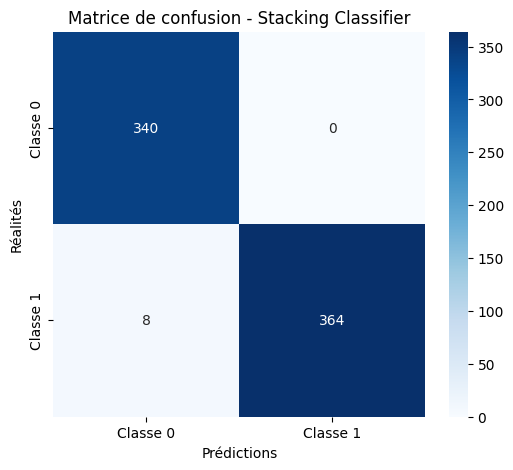

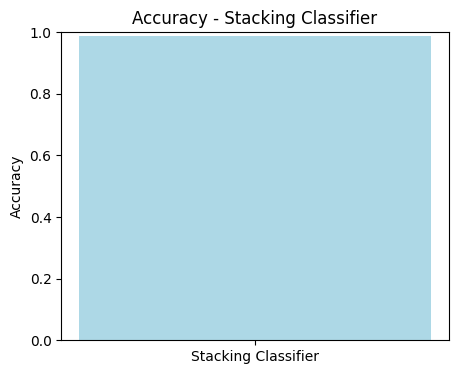

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les modèles de base
base_learners = [
    ('log_reg', LogisticRegression(max_iter=1000)),
    ('rf_model', RandomForestClassifier(random_state=42)),
    ('mlp_model', MLPClassifier(hidden_layer_sizes=(100,), random_state=42))
]

# Modèle de base (Stacking)
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Entraîner le modèle
stacking_model.fit(X_train, y_train)

# Prédictions
y_pred_stacking = stacking_model.predict(X_test)

# Évaluation
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)

print("Accuracy (Stacking):", accuracy_stacking)
print("Confusion Matrix (Stacking):\n", conf_matrix_stacking)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Stacking Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Stacking Classifier'], [accuracy_stacking], color='lightblue')
plt.title('Accuracy - Stacking Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


c . bagging

Accuracy (Bagging): 0.9943820224719101
Confusion Matrix (Bagging):
 [[338   2]
 [  2 370]]


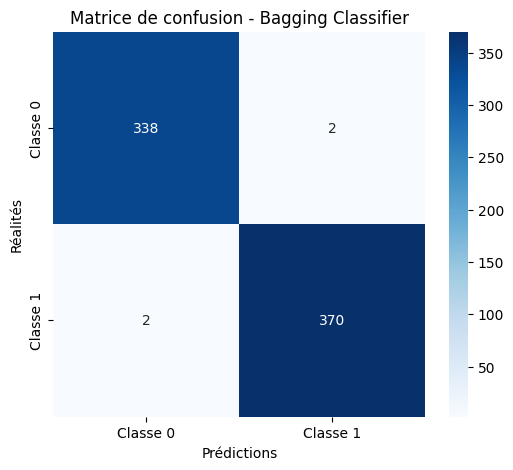

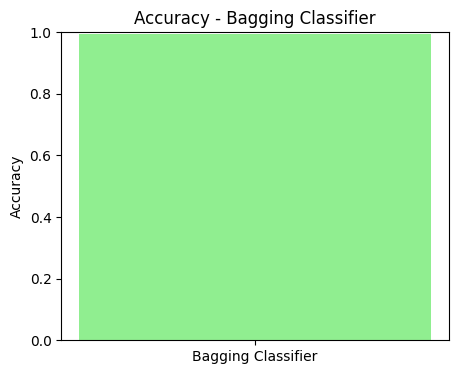

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle Bagging avec un RandomForestClassifier comme base
# Change 'base_estimator' to 'estimator'
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)

# Entraîner le modèle
bagging_model.fit(X_train, y_train)

# Prédictions
y_pred_bagging = bagging_model.predict(X_test)

# Évaluation
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
conf_matrix_bagging = confusion_matrix(y_test, y_pred_bagging)

print("Accuracy (Bagging):", accuracy_bagging)
print("Confusion Matrix (Bagging):\n", conf_matrix_bagging)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Bagging Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Bagging Classifier'], [accuracy_bagging], color='lightgreen')
plt.title('Accuracy - Bagging Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


d . boosting

Accuracy (Boosting): 0.9803370786516854
Confusion Matrix (Boosting):
 [[333   7]
 [  7 365]]


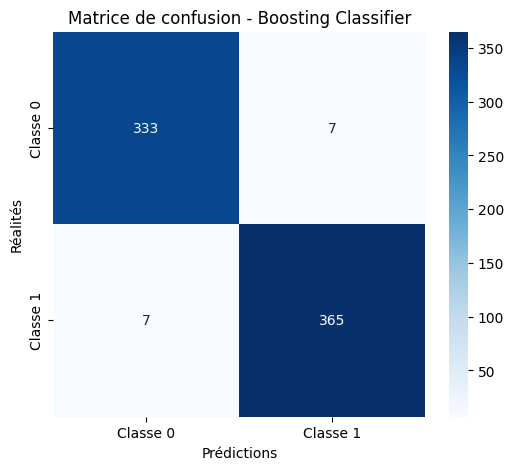

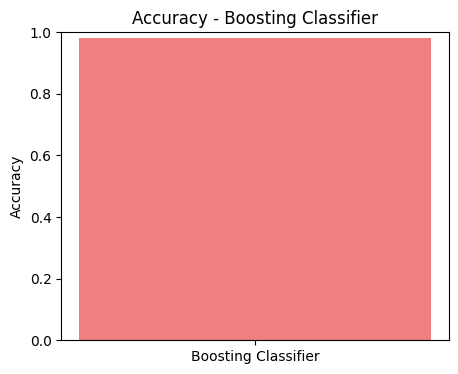

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle Boosting
boosting_model = GradientBoostingClassifier(random_state=42)

# Entraîner le modèle
boosting_model.fit(X_train, y_train)

# Prédictions
y_pred_boosting = boosting_model.predict(X_test)

# Évaluation
accuracy_boosting = accuracy_score(y_test, y_pred_boosting)
conf_matrix_boosting = confusion_matrix(y_test, y_pred_boosting)

print("Accuracy (Boosting):", accuracy_boosting)
print("Confusion Matrix (Boosting):\n", conf_matrix_boosting)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_boosting, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Boosting Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Boosting Classifier'], [accuracy_boosting], color='lightcoral')
plt.title('Accuracy - Boosting Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()



f . boost

Accuracy (Boost): 0.9269662921348315
Confusion Matrix (Boost):
 [[317  23]
 [ 29 343]]


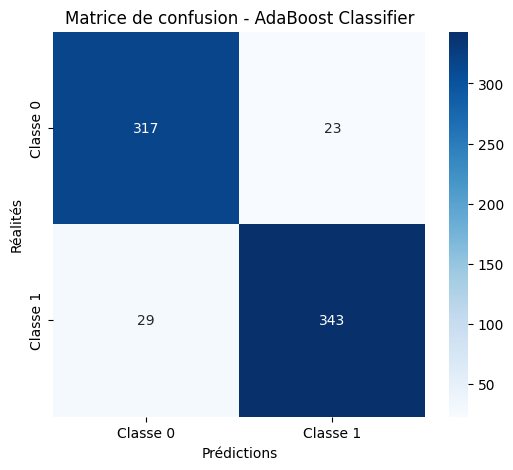

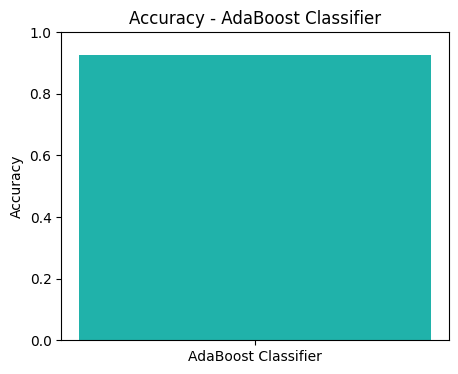

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle Boost (AdaBoost)
base_model = DecisionTreeClassifier(max_depth=1)  # Utilisation d'arbres de décision peu profonds
boost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Entraîner le modèle
boost_model.fit(X_train, y_train)

# Prédictions
y_pred_boost = boost_model.predict(X_test)

# Évaluation
accuracy_boost = accuracy_score(y_test, y_pred_boost)
conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)

print("Accuracy (Boost):", accuracy_boost)
print("Confusion Matrix (Boost):\n", conf_matrix_boost)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_boost, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - AdaBoost Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['AdaBoost Classifier'], [accuracy_boost], color='lightseagreen')
plt.title('Accuracy - AdaBoost Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


g . Random Forests

Accuracy (Random Forest): 0.9957865168539326
Confusion Matrix (Random Forest):
 [[339   1]
 [  2 370]]


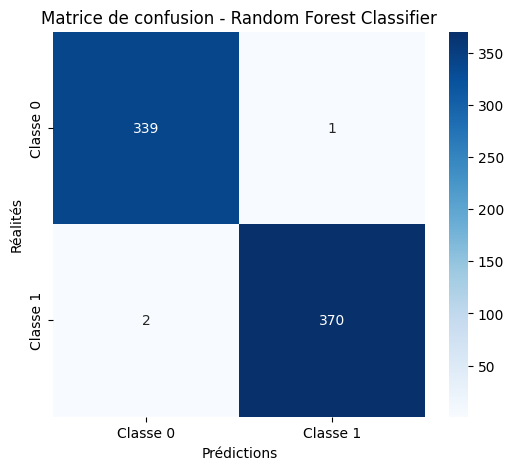

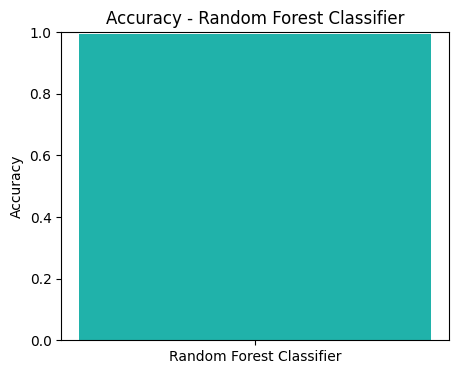

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialisation du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_test)

# Évaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)
print("Confusion Matrix (Random Forest):\n", conf_matrix_rf)

# Visualisation de la matrice de confusion
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.title('Matrice de confusion - Random Forest Classifier')
plt.xlabel('Prédictions')
plt.ylabel('Réalités')
plt.show()

# Visualisation de l'accuracy
plt.figure(figsize=(5, 4))
plt.bar(['Random Forest Classifier'], [accuracy_rf], color='lightseagreen')
plt.title('Accuracy - Random Forest Classifier')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.show()


In [ ]:
pip install --upgrade xgboost


## **4 .Cross Validation**

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro

Erreur lors de la validation croisée pour XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...): 'super' object has no attribute '__sklearn_tags__'


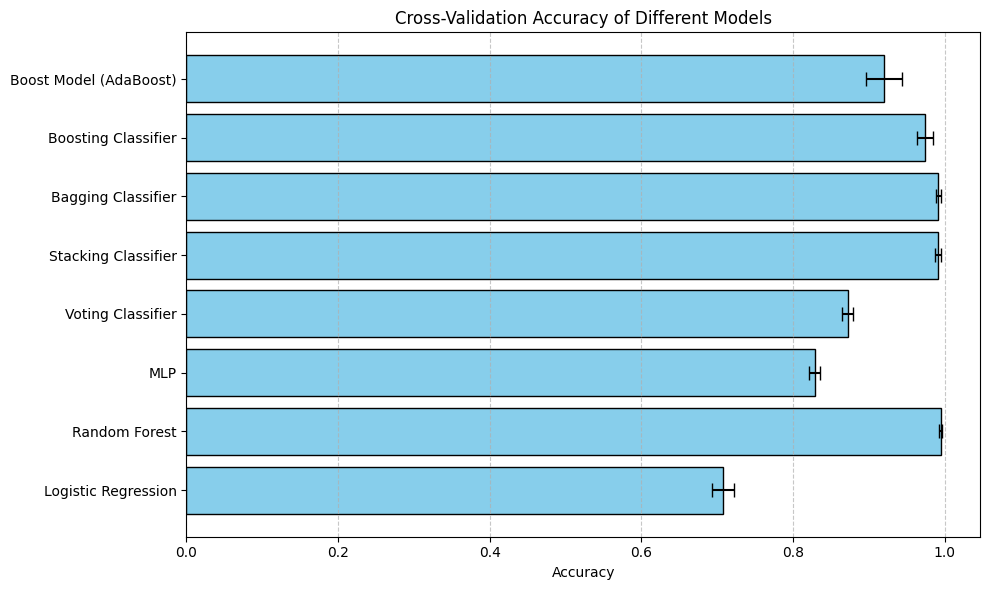

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

# Fonction pour effectuer la validation croisée
def cross_val_evaluation(model, X, y, cv_folds=5):
    # Utilisation de la validation croisée avec StratifiedKFold pour gérer les classes déséquilibrées
    cv = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)

    # Calcul des scores de validation croisée
    try:
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
        mean_score = np.mean(cv_scores)
        std_score = np.std(cv_scores)
    except Exception as e:
        print(f"Erreur lors de la validation croisée pour {model}: {e}")
        mean_score = np.nan
        std_score = np.nan

    # Retourner la moyenne et l'écart-type des scores
    return mean_score, std_score

# Liste des modèles à évaluer
models = [
    ('Logistic Regression', log_reg),
    ('Random Forest', rf_model),
    ('MLP', mlp_model),
    ('Voting Classifier', voting_model),
    ('Stacking Classifier', stacking_model),
    ('Bagging Classifier', bagging_model),
    ('Boosting Classifier', boosting_model),
    ('Boost Model (AdaBoost)', boost_model),
    ('XGBoost', xgb_model)
]

# Variables pour stocker les résultats de la validation croisée
model_names = []
mean_scores = []
std_scores = []

# Appliquer la validation croisée pour chaque modèle
for name, model in models:
    mean_score, std_score = cross_val_evaluation(model, X, y)
    model_names.append(name)
    mean_scores.append(mean_score)
    std_scores.append(std_score)

# Création du plot
plt.figure(figsize=(10, 6))
plt.barh(model_names, mean_scores, xerr=std_scores, capsize=5, color='skyblue', edgecolor='black')

# Ajouter des labels et un titre
plt.xlabel('Accuracy')
plt.title('Cross-Validation Accuracy of Different Models')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Afficher le plot
plt.show()


## **5 . Models Evaluation**

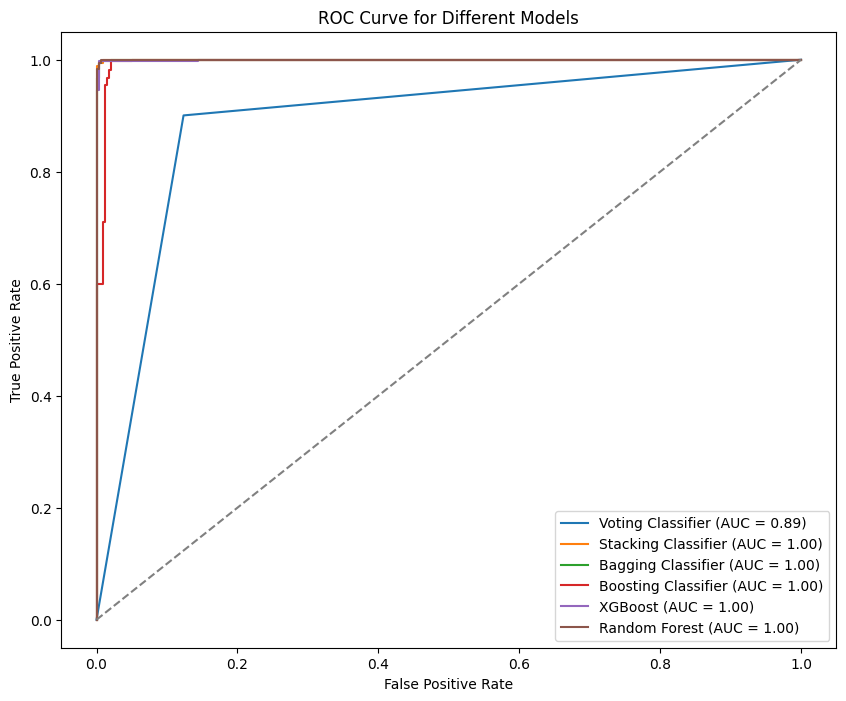

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from xgboost import XGBClassifier  # Assurez-vous d'utiliser ce classificateur

# Fonction pour afficher la courbe ROC
def plot_roc_curve(model, X_test, y_test, label):
    try:
        # Vérification si le modèle supporte 'predict_proba'
        if hasattr(model, "predict_proba"):
            # Si le modèle supporte 'predict_proba', utilisez-le
            y_pred = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
        else:
            # Utilisez 'predict' si 'predict_proba' n'est pas disponible
            y_pred = model.predict(X_test)
            y_pred = (y_pred == 1).astype(int)  # Convertir les labels en 0 ou 1 pour la courbe ROC

        # Calcul de la courbe ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        auc_score = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{label} (AUC = {auc_score:.2f})')

    except Exception as e:
        print(f"Error with model {label}: {e}")

# Exemple d'entraînement du modèle XGBoost pour classification binaire
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Plot ROC pour chaque modèle d'Ensemble Learning et XGBoost
plt.figure(figsize=(10, 8))
plot_roc_curve(voting_model, X_test, y_test, "Voting Classifier")
plot_roc_curve(stacking_model, X_test, y_test, "Stacking Classifier")
plot_roc_curve(bagging_model, X_test, y_test, "Bagging Classifier")
plot_roc_curve(boosting_model, X_test, y_test, "Boosting Classifier")
plot_roc_curve(xgb_model, X_test, y_test, "XGBoost")
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")

# Ligne de référence pour un classificateur aléatoire
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curve for Different Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()

